# INTRODUCTION
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


## Read Data

In [2]:
# We are reading our data
df = pd.read_csv("../input/heart.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

## Data Exploration

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

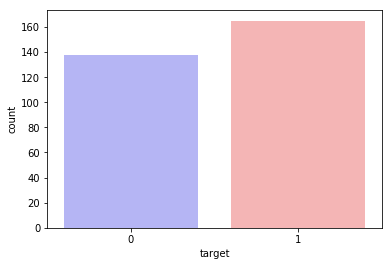

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


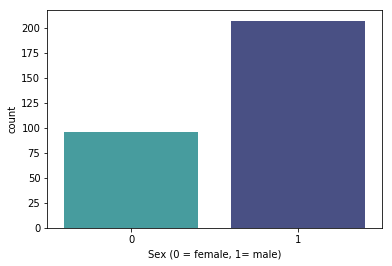

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


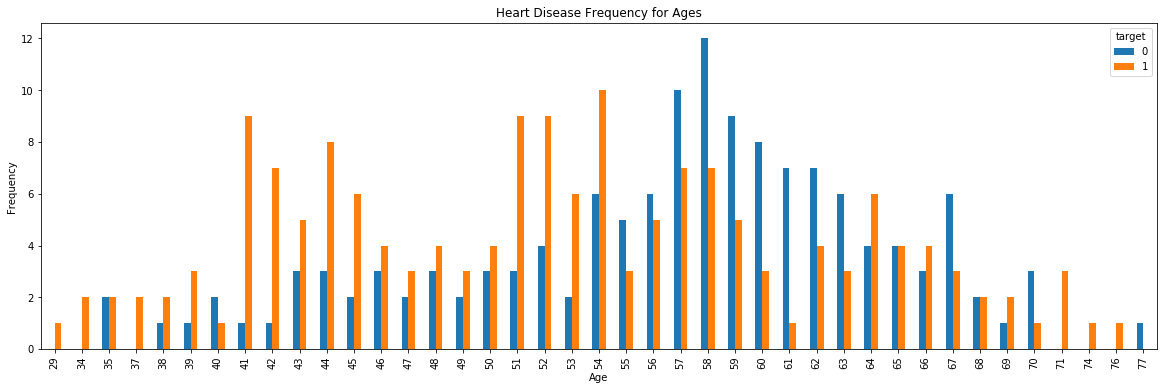

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

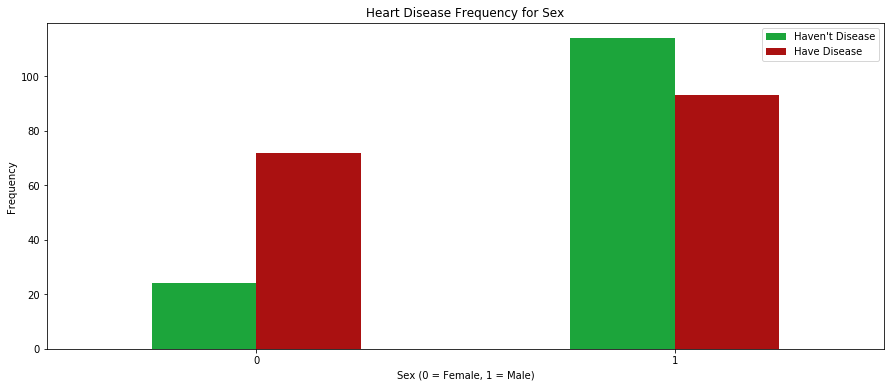

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

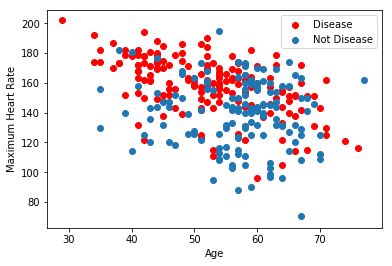

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

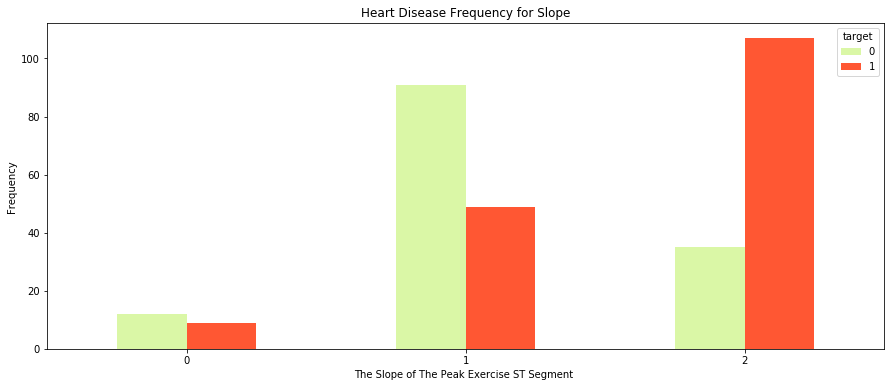

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

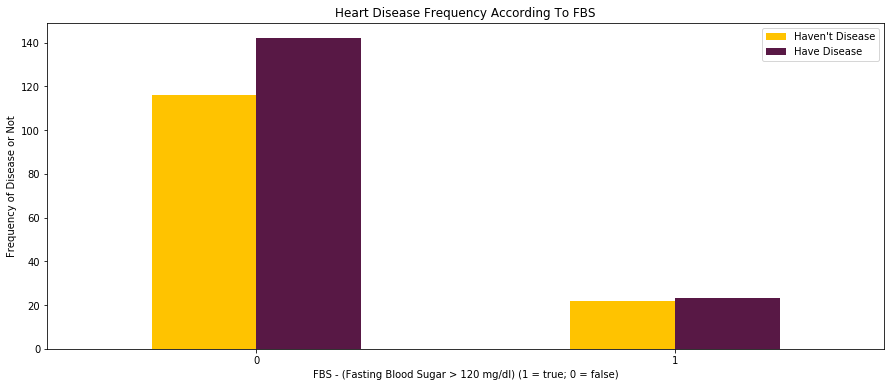

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

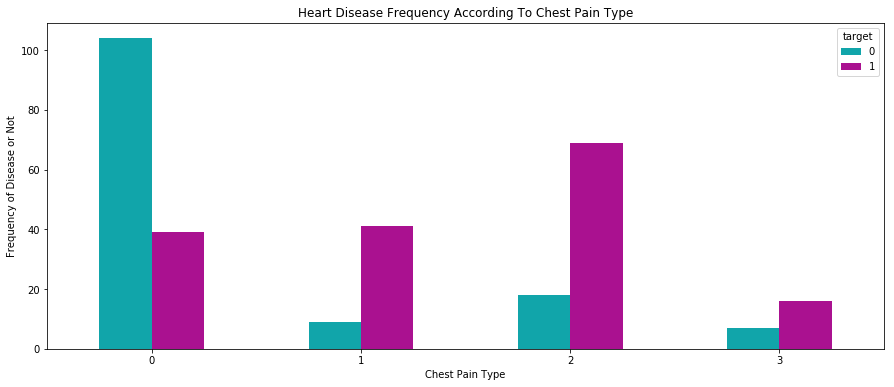

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

1. ### Creating Dummy Variables

![](http://)Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [16]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [17]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [18]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [19]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [20]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [22]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Let's say weight = 0.01 and bias = 0.0

Accuracy is :  0.756
Accuracy is: 0.8263333333333334
Accuracy is: 0.7976666666666667


Text(0.5, 1.0, 'Model Accracy')

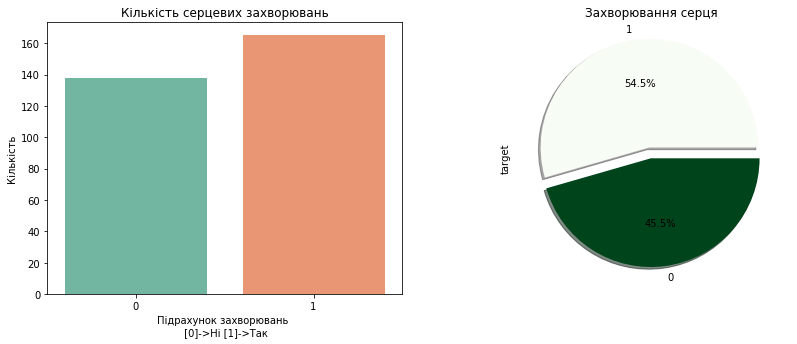

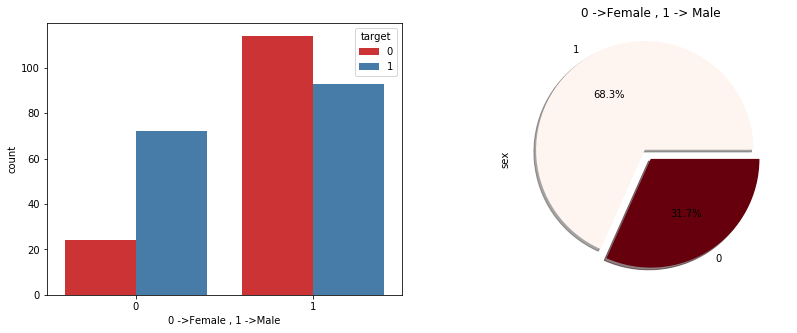

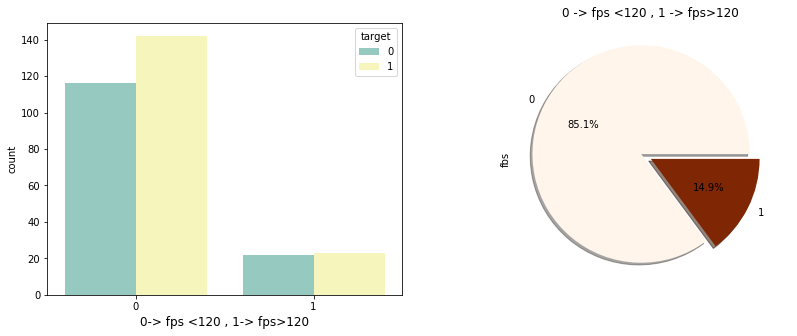

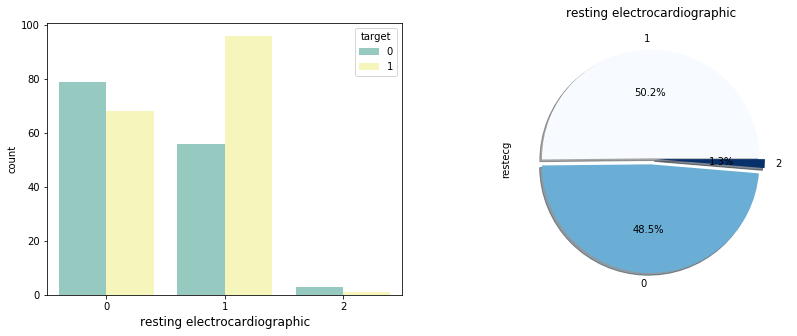

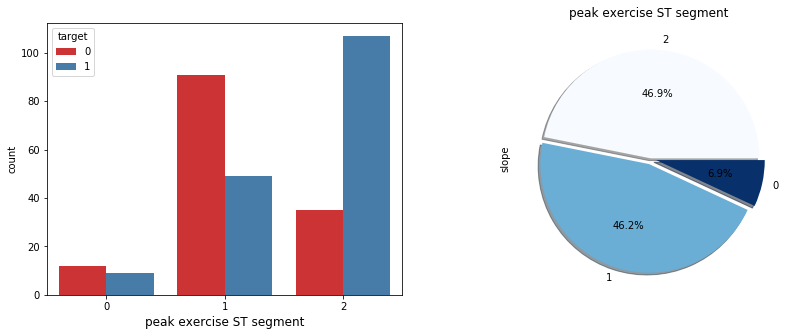

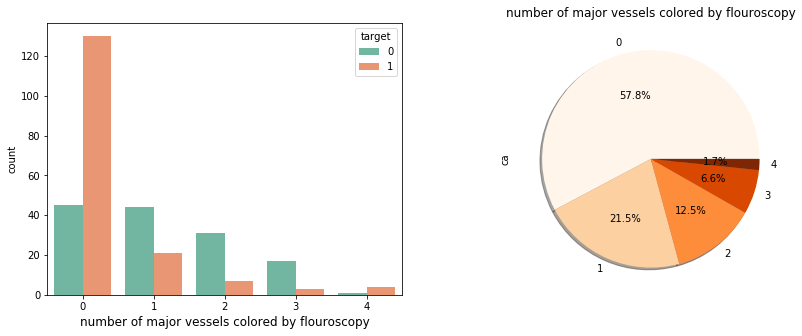

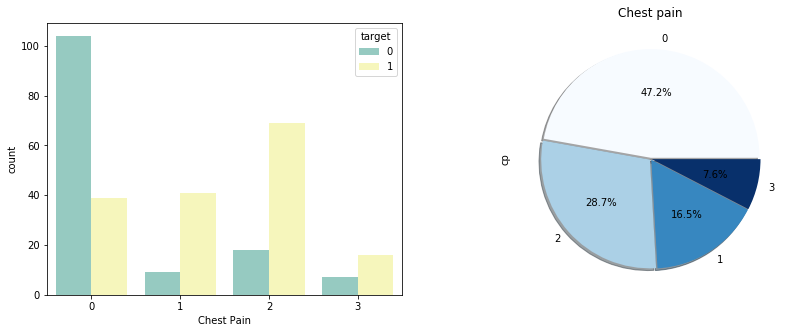

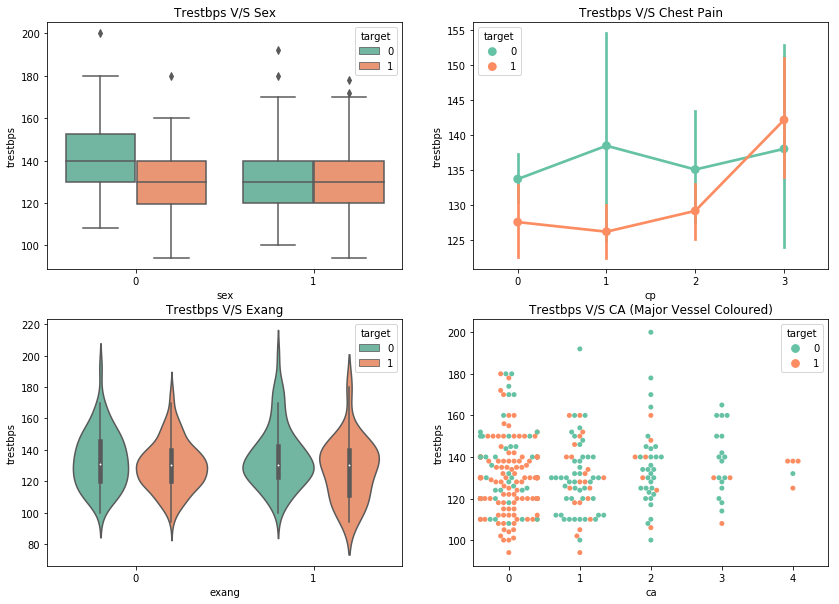

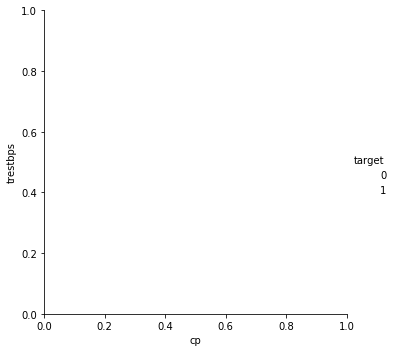

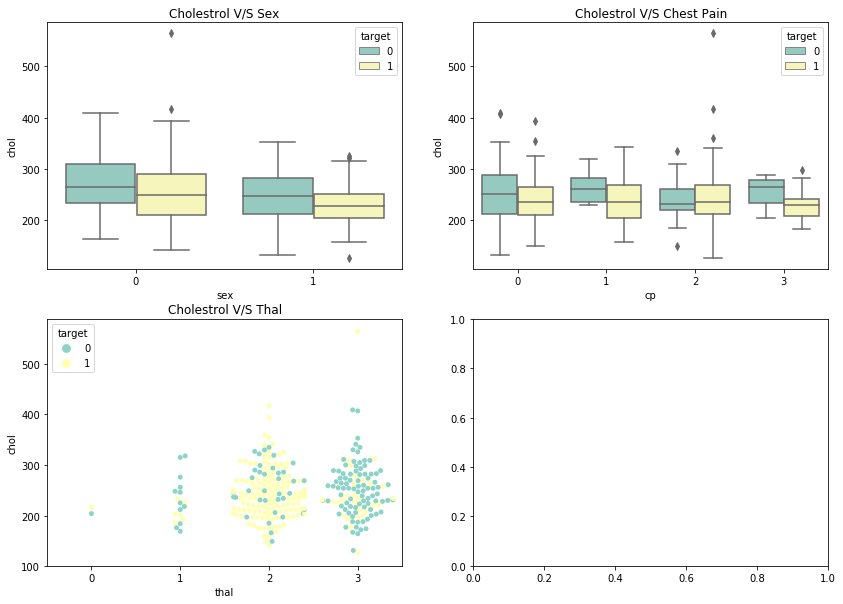

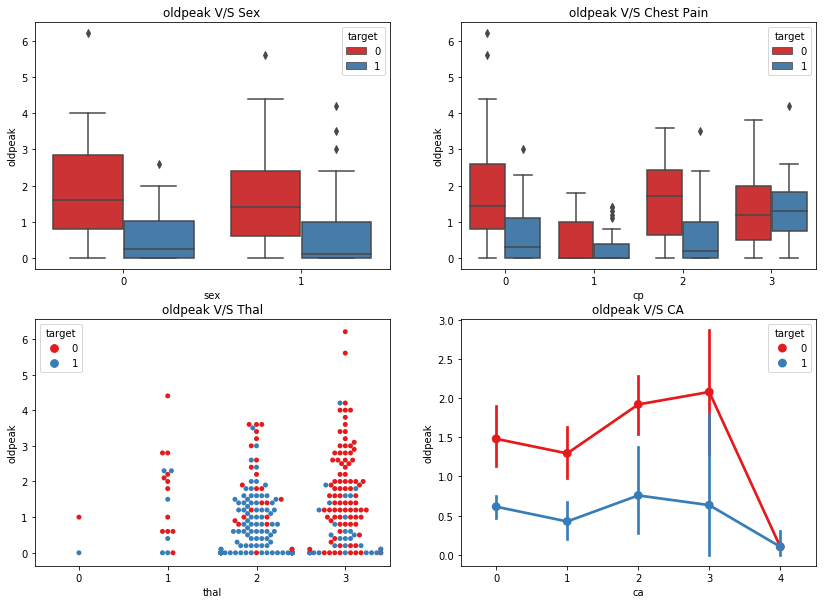

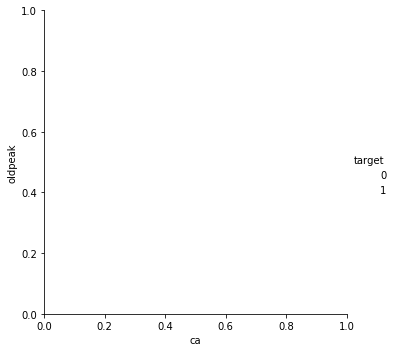

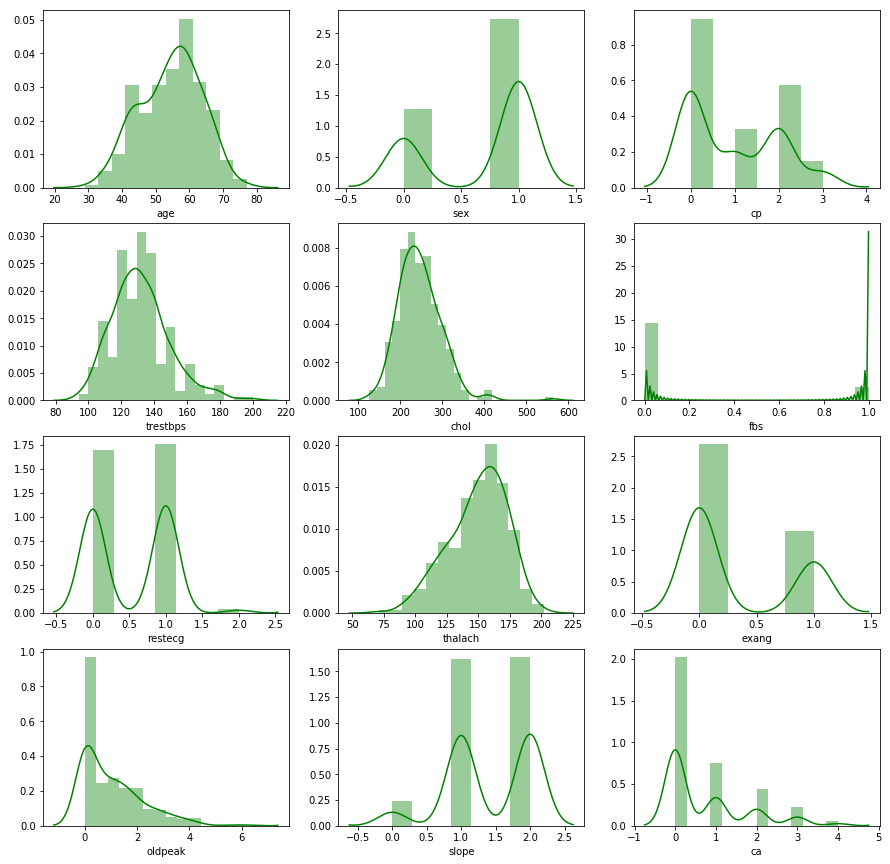

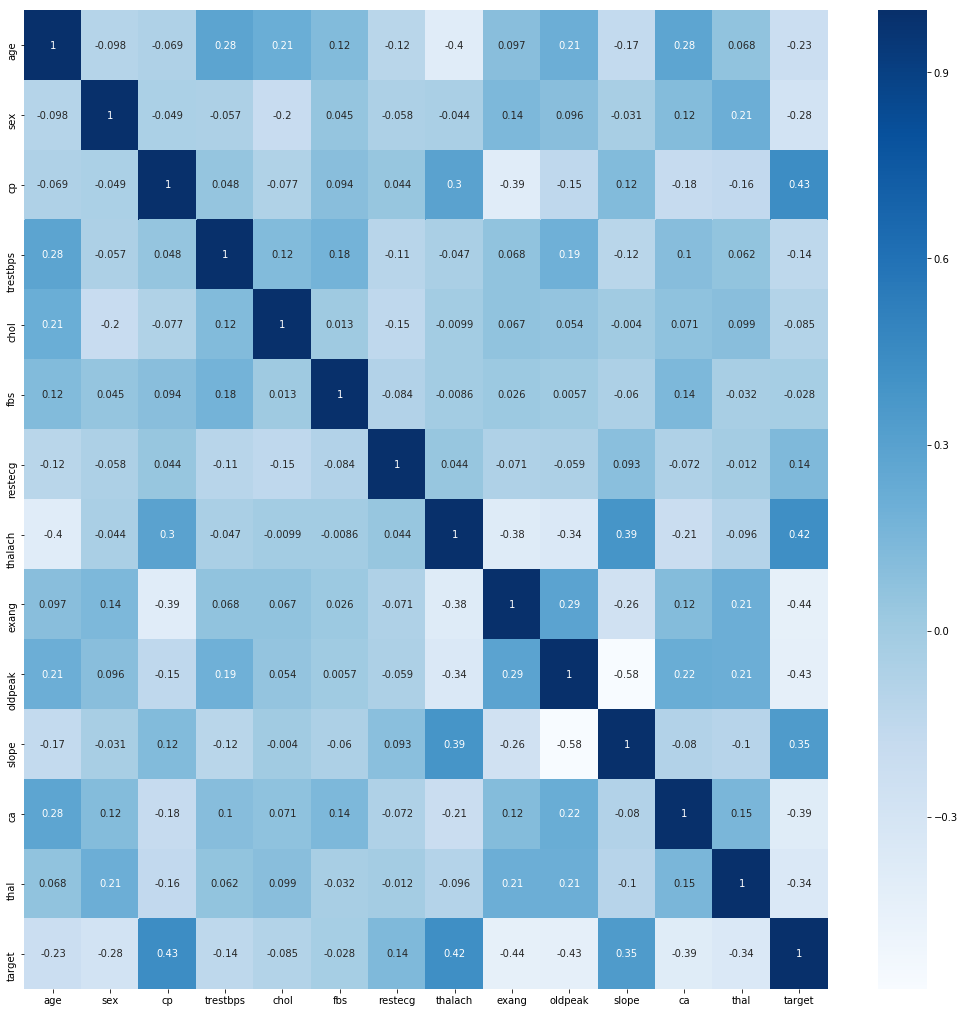

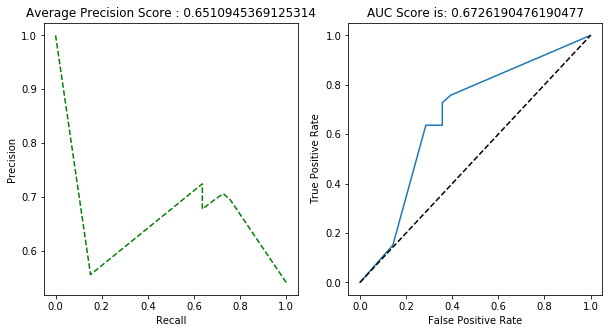

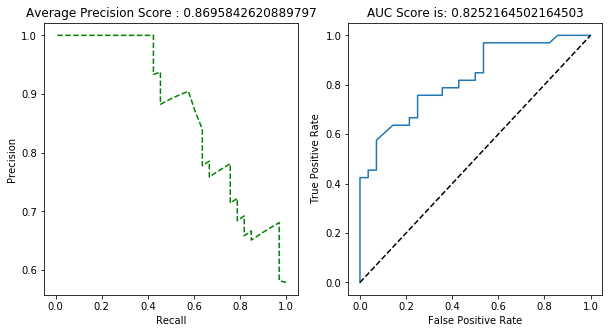

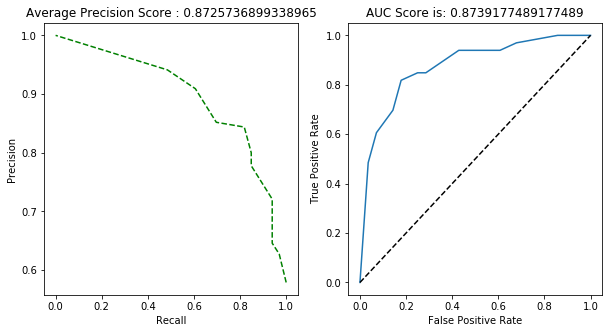

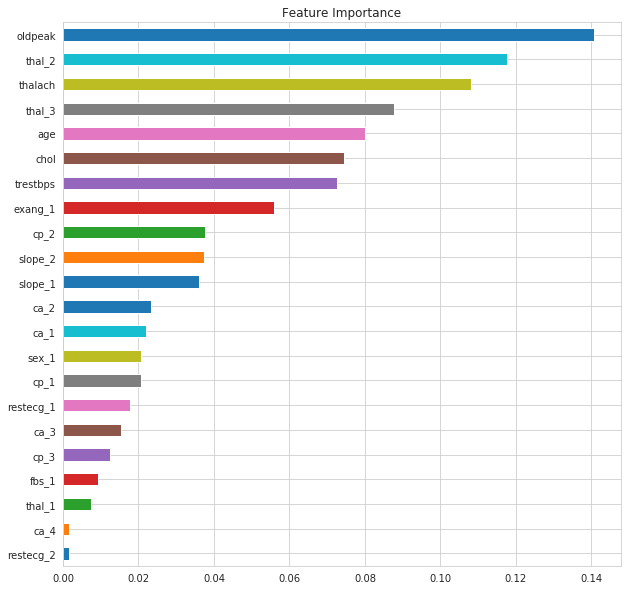

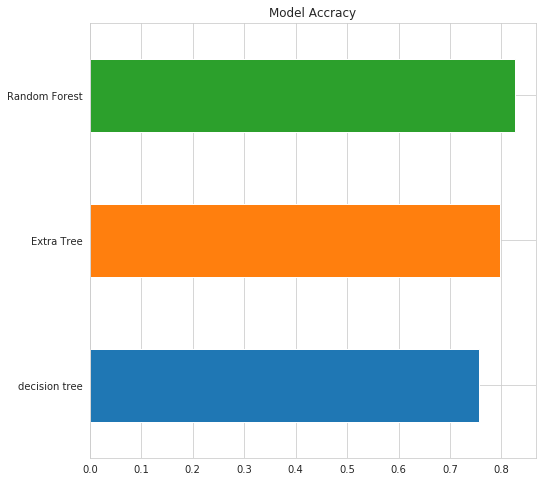

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()
data=pd.read_csv('../input/heart.csv')
data.head()
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Підрахунок захворювань \n [0]->Ні [1]->Так")
ax[0].set_ylabel("Кількість")
ax[0].set_title("Кількість серцевих захворювань")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Захворювання серця")
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flouroscopy",size=12)
data.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flouroscopy",size=12)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='trestbps',data=data,x='sex',hue='target',palette='Set2',ax=ax[0,0])
ax[0,0].set_title("Trestbps V/S Sex")
sns.factorplot(y='trestbps',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set2')
ax[0,1].set_title("Trestbps V/S Chest Pain")
sns.violinplot(y='trestbps',data=data,x='exang',hue='target',ax=ax[1,0],palette='Set2')
ax[1,0].set_title("Trestbps V/S Exang")
sns.swarmplot(y='trestbps',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set2')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='chol',data=data,x='sex',hue='target',palette='Set3',ax=ax[0,0])
ax[0,0].set_title("Cholestrol V/S Sex")
sns.boxplot(y='chol',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set3')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(y='chol',data=data,x='thal',hue='target',ax=ax[1,0],palette='Set3')
ax[1,0].set_title("Cholestrol V/S Thal")
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='oldpeak',data=data,x='sex',hue='target',palette='Set1',ax=ax[0,0])
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(y='oldpeak',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(y='oldpeak',data=data,x='thal',hue='target',ax=ax[1,0],palette='Set1')
ax[1,0].set_title("oldpeak V/S Thal")
sns.factorplot(y='oldpeak',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set1')
ax[1,1].set_title("oldpeak V/S CA")
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i],kde=True, color='green')
fig=plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot= True, cmap='Blues')
data.sex=data.sex.astype('category')
data.cp=data.cp.astype('category')
data.fbs=data.fbs.astype('category')
data.restecg=data.restecg.astype('category')
data.exang=data.exang.astype('category')
data.ca=data.ca.astype('category')
data.slope=data.slope.astype('category')
data.thal=data.thal.astype('category')
data_label=data['target']
del data['target']
data_label=pd.DataFrame(data_label)
data=pd.get_dummies(data,drop_first=True)
data.head(),data_label.head()
from sklearn.preprocessing import StandardScaler
data_scaled=StandardScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.20,
                                             stratify=data_label,random_state=975456)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
dtc=DecisionTreeClassifier(max_depth=7)
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
plotting(Ytest,dtc.predict_proba(Xtest))

rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=253)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

etc=ExtraTreesClassifier(n_estimators=10, n_jobs=-1, random_state=800)
score_etc= CrossVal(Xtrain,Ytrain,etc)
print('Accuracy is:',score_etc)
etc.fit(Xtrain,Ytrain)
plotting(Ytest,etc.predict_proba(Xtest))

fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index=Xtrain.columns)
sns.set_style('whitegrid')
important.sort_values().plot.barh()
plt.title('Feature Importance')
model_accuracy = pd.Series(data=[score_dtc, score_rf, score_etc, ], 
                           index=['decision tree','Random Forest', 'Extra Tree'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')


